In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
data = pd.read_csv("test_data/test_data.csv")
data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)
data


,problem,reward,seed,set,reward_function,train_size
0,101,1.000000,10,shifts_easy_ratio_mixed,stepbonus,8
1,202,1.000000,10,shifts_easy_ratio_mixed,stepbonus,8
2,303,1.000000,10,shifts_easy_ratio_mixed,stepbonus,8
3,404,1.000000,10,shifts_easy_ratio_mixed,stepbonus,8
4,505,1.000000,10,shifts_easy_ratio_mixed,stepbonus,8
...,...,...,...,...,...,...
1795,4646,-0.444444,31,shifts_extrahard_ratio_mixed,terminal,8
1796,4747,-0.500000,31,shifts_extrahard_ratio_mixed,terminal,8
1797,4848,-0.388889,31,shifts_extrahard_ratio_mixed,terminal,8
1798,4949,-0.500000,31,shifts_extrahard_ratio_mixed,terminal,8


In [16]:
conditions = [data['set'] == 'shifts_easy_ratio_mixed',
              data['set'] == 'shifts_medium_ratio_mixed',
              data['set'] == 'shifts_hard_ratio_mixed',
              data['set'] == 'shifts_extrahard_ratio_mixed',
            ]
outputs = [1,2,3,4]
X = np.select(conditions, outputs, 'Other')
data['X'] = X

data.head()

,problem,reward,seed,set,reward_function,train_size,X
0,101,1.0,10,shifts_easy_ratio_mixed,stepbonus,8,1
1,202,1.0,10,shifts_easy_ratio_mixed,stepbonus,8,1
2,303,1.0,10,shifts_easy_ratio_mixed,stepbonus,8,1
3,404,1.0,10,shifts_easy_ratio_mixed,stepbonus,8,1
4,505,1.0,10,shifts_easy_ratio_mixed,stepbonus,8,1


In [11]:
#data.pivot(index='set', columns='reward_function', values=['reward'])

In [17]:
hmm = data.groupby(['reward_function','X']).agg({
                                        'reward':'mean'
                                        }).reset_index()

hmm

,reward_function,X,reward
0,step,1,0.592000
1,step,2,0.379712
2,step,3,0.328772
3,step,4,0.306128
4,stepbonus,1,0.938333
5,stepbonus,2,1.000000
6,stepbonus,3,1.000000
7,stepbonus,4,1.000000
8,terminal,1,-0.046714
9,terminal,2,-0.340655


<AxesSubplot:xlabel='X', ylabel='reward'>

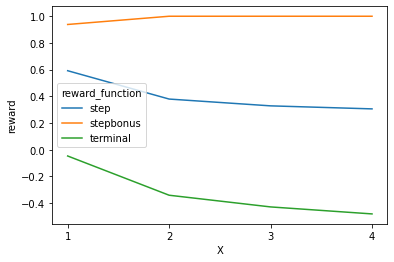

In [18]:
sns.lineplot(x="X", y="reward", hue="reward_function", data=hmm)

In [ ]:
#### archive ####

In [6]:
piv = hmm.pivot(index='set', columns='reward_function', values=['reward'])
piv.columns = piv.columns.get_level_values(1)

plot_data = piv.reset_index()
plot_data

reward_function,set,step,stepbonus,terminal
0,shifts_easy_ratio_mixed,0.592000,0.938333,-0.046714
1,shifts_hard_ratio_mixed,0.328772,1.000000,-0.428233
2,shifts_medium_ratio_mixed,0.379712,1.000000,-0.340655


In [7]:
erm = plot_data.transpose()

well = erm.rename(columns=erm.iloc[0]).drop(erm.index[0]).reindex(columns = ['shifts_easy_ratio_mixed','shifts_medium_ratio_mixed','shifts_hard_ratio_mixed']).transpose()

well

reward_function,step,stepbonus,terminal
shifts_easy_ratio_mixed,0.592,0.938333,-0.0467143
shifts_medium_ratio_mixed,0.379712,1,-0.340655
shifts_hard_ratio_mixed,0.328772,1,-0.428233


DataError: No numeric types to aggregate

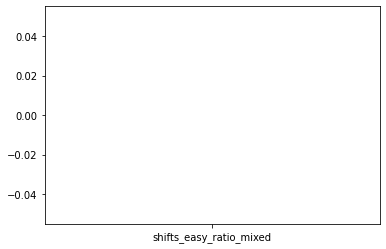

In [8]:
sns.lineplot(data=well)